# Đồ Án Khoa Học Máy Tính
## Phân loại nấm

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score,precision_score

### 1.Thu thập dữ liệu

In [2]:
df = pd.read_csv('Data\Data_Mushrooms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


### 2. Xử lý dữ liệu

In [5]:
df.isnull().sum(axis = 0)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.nunique().sort_values()

veil-type                    1
class                        2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
cap-surface                  4
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

### veil-type có 1 giá trị → drop

In [7]:
df = df.drop(columns = ['veil-type'])
df.shape

(8124, 22)

In [8]:
for col in df:
    print(f'{col} : {df[col].unique()}')

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
df[['cap-shape' , 'cap-surface' ]][0:5]

,cap-shape,cap-surface
0,x,s
1,x,s
2,b,s
3,x,y
4,x,s


In [11]:
missing_values = df[df['stalk-root'] == '?']
missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2480 entries, 3984 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     2480 non-null   object
 1   cap-shape                 2480 non-null   object
 2   cap-surface               2480 non-null   object
 3   cap-color                 2480 non-null   object
 4   bruises                   2480 non-null   object
 5   odor                      2480 non-null   object
 6   gill-attachment           2480 non-null   object
 7   gill-spacing              2480 non-null   object
 8   gill-size                 2480 non-null   object
 9   gill-color                2480 non-null   object
 10  stalk-shape               2480 non-null   object
 11  stalk-root                2480 non-null   object
 12  stalk-surface-above-ring  2480 non-null   object
 13  stalk-surface-below-ring  2480 non-null   object
 14  stalk-color-above-rin

In [12]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [13]:
#xử lý missing: Thay ? = b
df = df.replace(['?'],'b')
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [14]:
print(df['class'].value_counts())

e    4208
p    3916
Name: class, dtype: int64


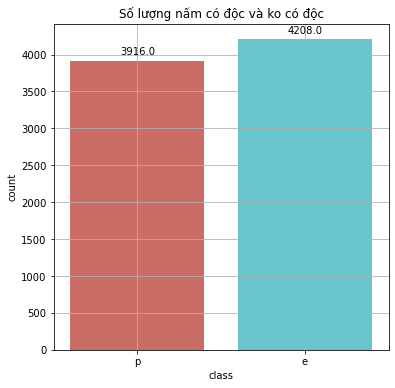

In [15]:
plt.figure(figsize = (6,6))
c = sns.countplot(x = 'class', data = df, palette = 'hls')
for p in c.patches:
        c.annotate(format(p.get_height(), '.1f'),
                      (p.get_x()+p.get_width()/2.,p.get_height()),
                       ha = 'center', 
                       va = 'center', 
                       xytext = (0,9),
                       textcoords ='offset points')
plt.title('Số lượng nấm có độc và ko có độc')
plt.grid(True)

Các Giá trị trong thuộc tính: cap-shape


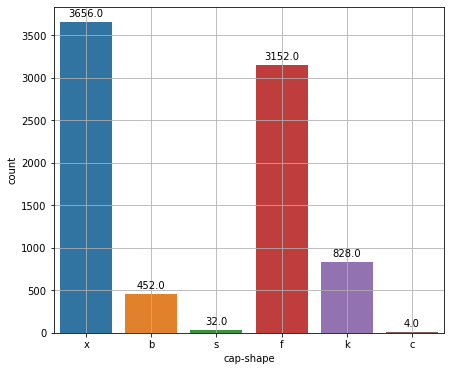

Các Giá trị trong thuộc tính: cap-surface


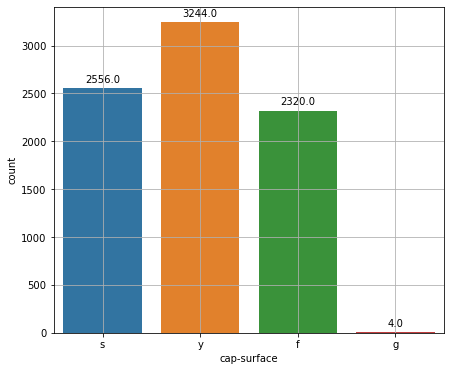

Các Giá trị trong thuộc tính: cap-color


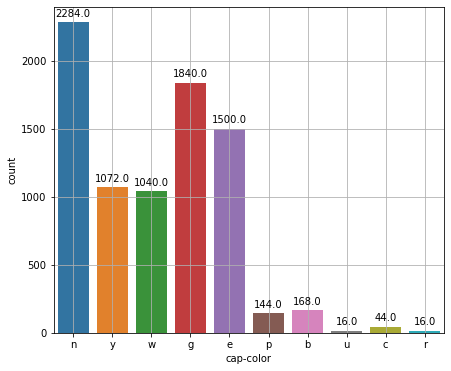

Các Giá trị trong thuộc tính: bruises


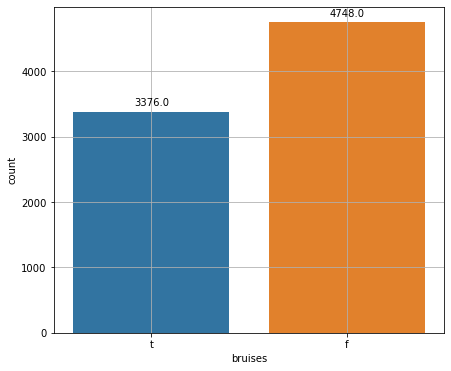

Các Giá trị trong thuộc tính: odor


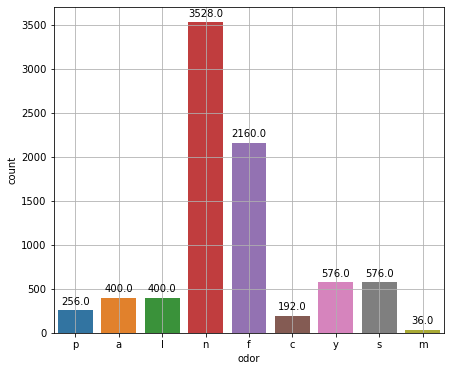

Các Giá trị trong thuộc tính: gill-attachment


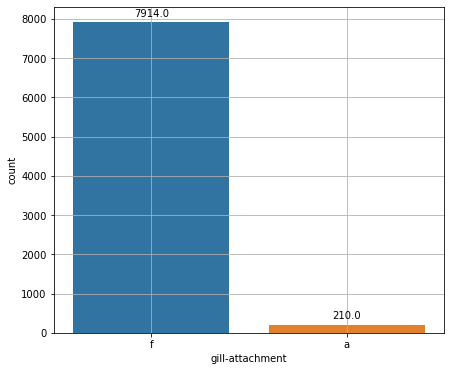

Các Giá trị trong thuộc tính: gill-spacing


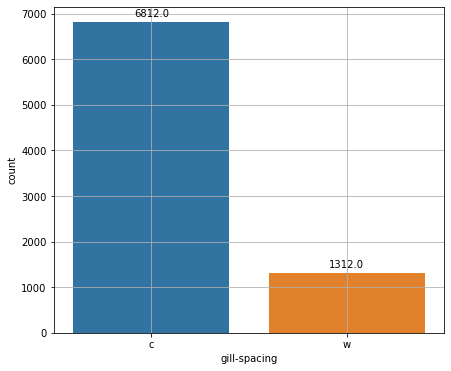

Các Giá trị trong thuộc tính: gill-size


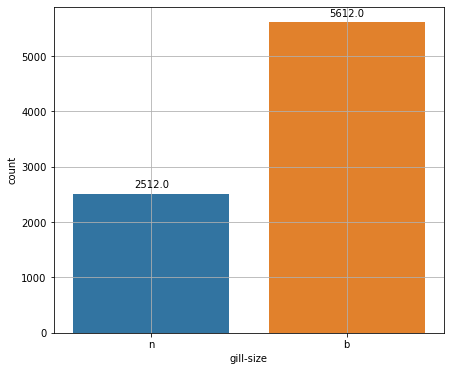

Các Giá trị trong thuộc tính: gill-color


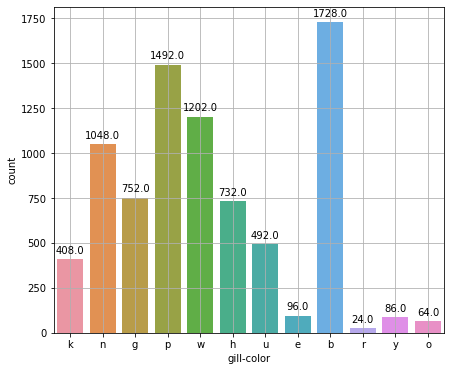

Các Giá trị trong thuộc tính: stalk-shape


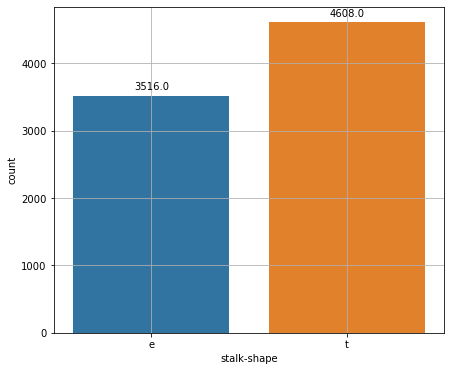

Các Giá trị trong thuộc tính: stalk-root


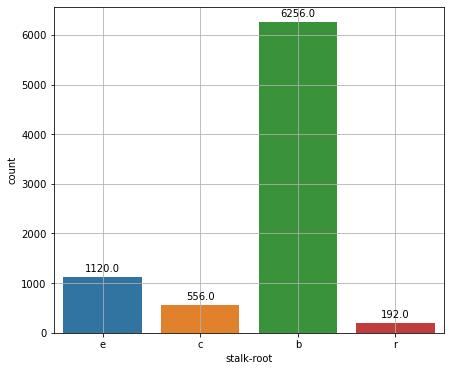

Các Giá trị trong thuộc tính: stalk-surface-above-ring


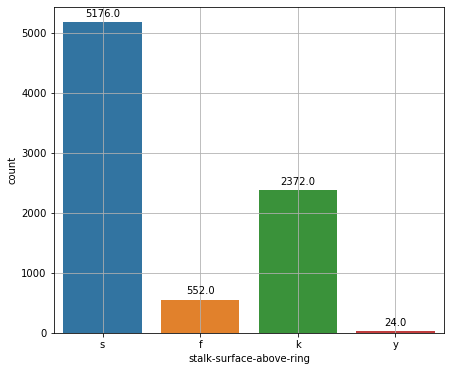

Các Giá trị trong thuộc tính: stalk-surface-below-ring


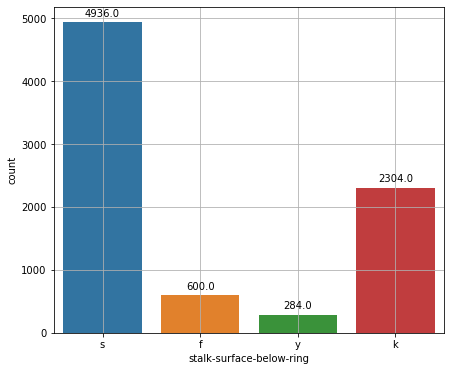

Các Giá trị trong thuộc tính: stalk-color-above-ring


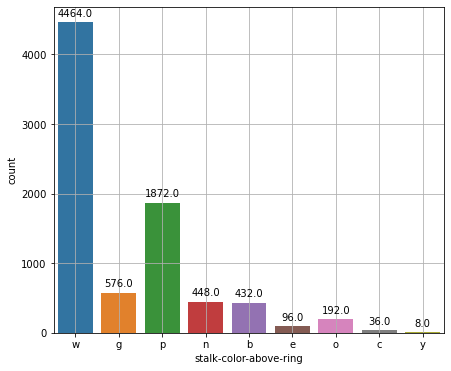

Các Giá trị trong thuộc tính: stalk-color-below-ring


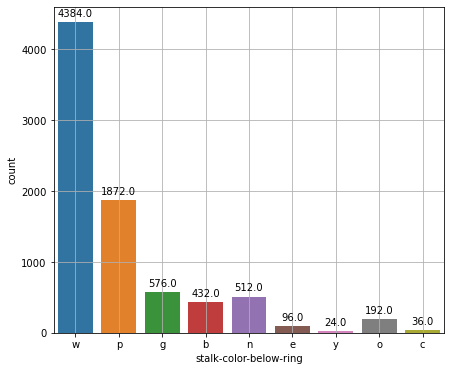

Các Giá trị trong thuộc tính: veil-color


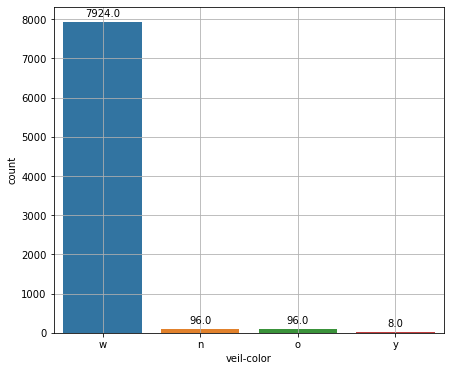

Các Giá trị trong thuộc tính: ring-number


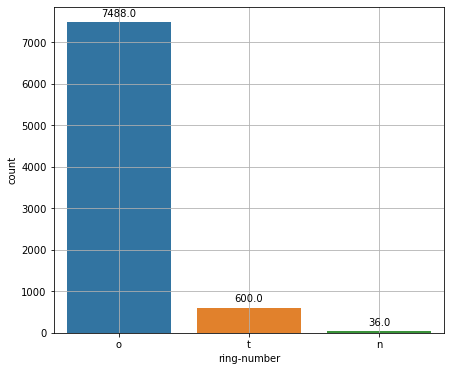

Các Giá trị trong thuộc tính: ring-type


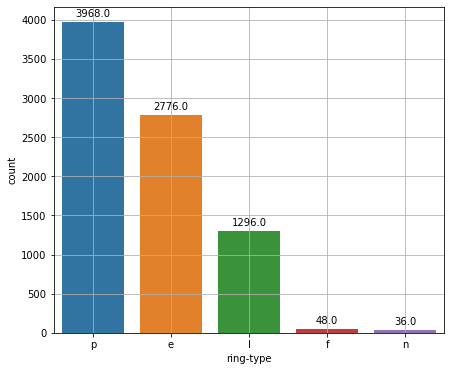

Các Giá trị trong thuộc tính: spore-print-color


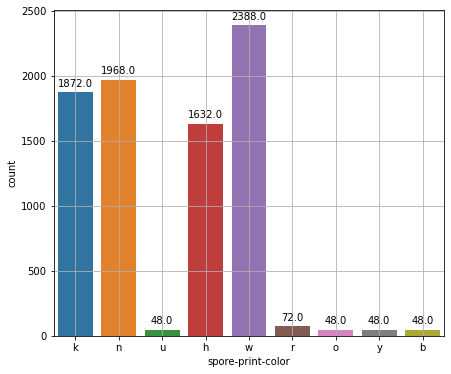

Các Giá trị trong thuộc tính: population


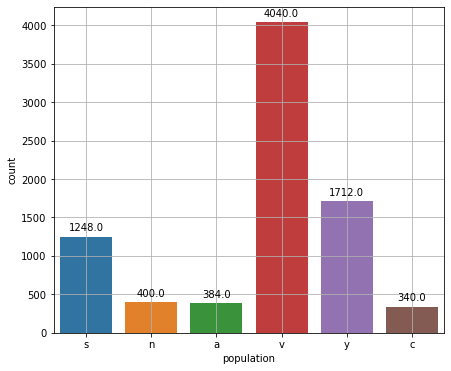

Các Giá trị trong thuộc tính: habitat


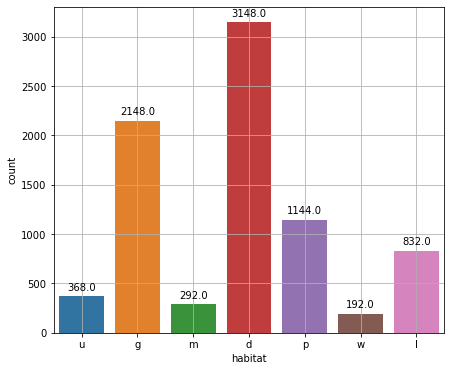

In [16]:
for col in df.columns[1:]:
    plt.figure(figsize = (7,6))
    print('Các Giá trị trong thuộc tính:',col)
    g = sns.countplot(data = df, x = col)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.1f'),
                  (p.get_x()+ p.get_width()/2, p.get_height()),
                  ha = 'center', va = 'center',
                  xytext=(0,9),
                  textcoords = 'offset points')
    plt.grid(True)
    plt.show()

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh cap-shape


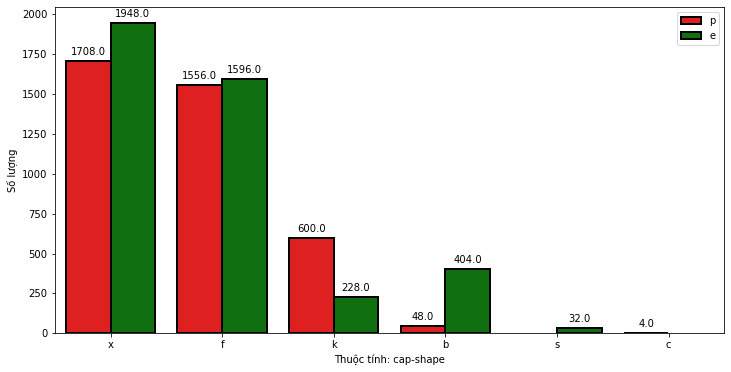

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh cap-surface


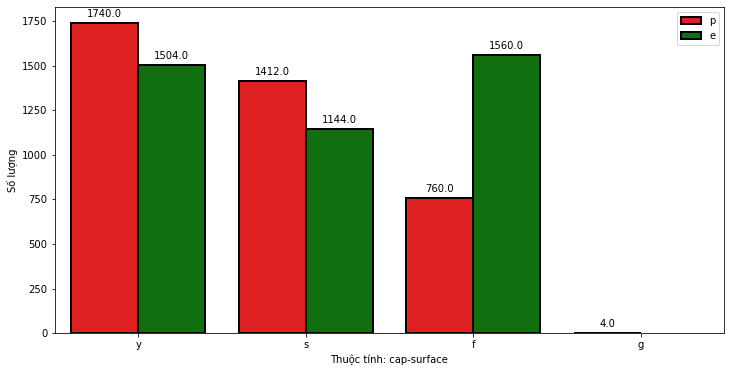

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh cap-color


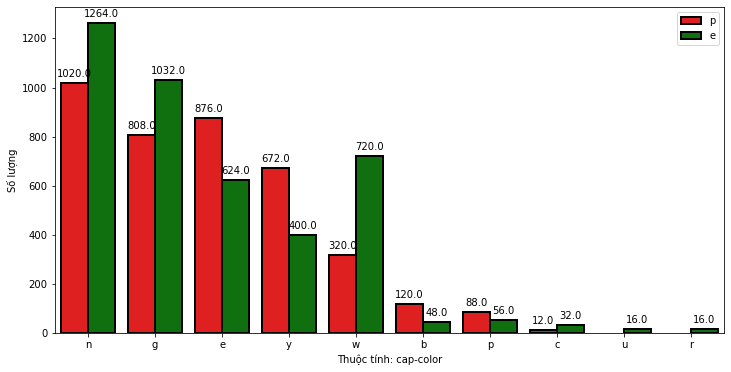

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh bruises


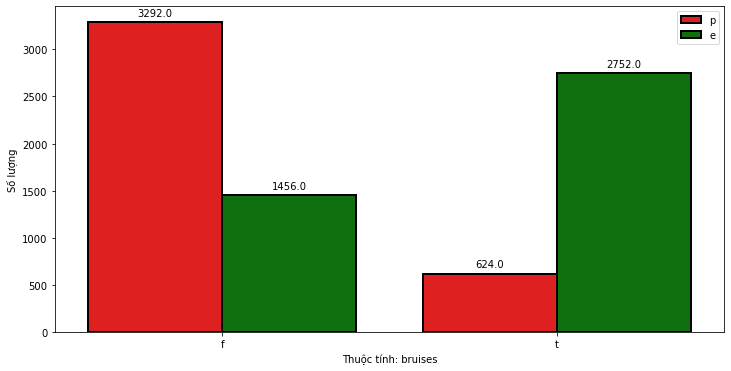

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh odor


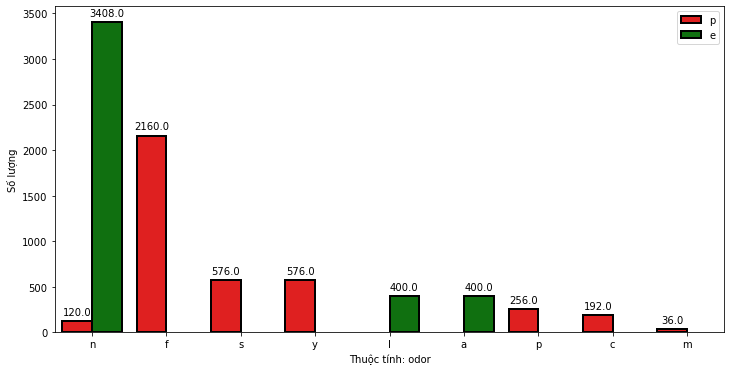

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh gill-attachment


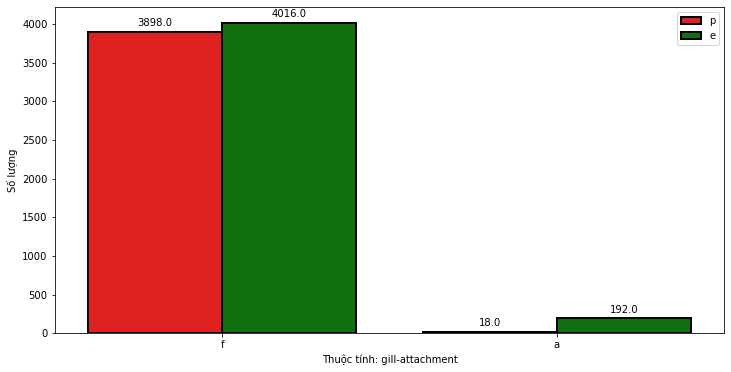

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh gill-spacing


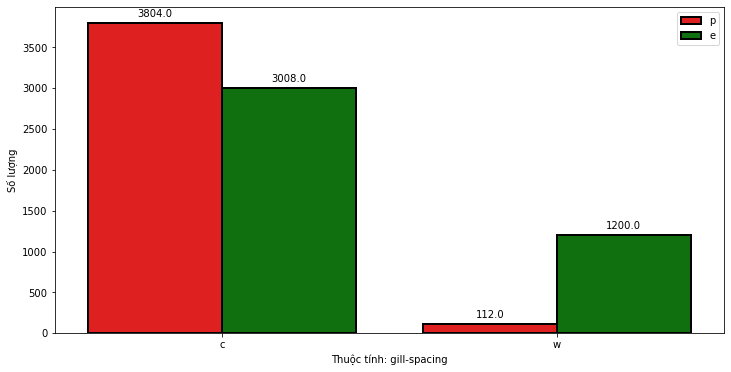

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh gill-size


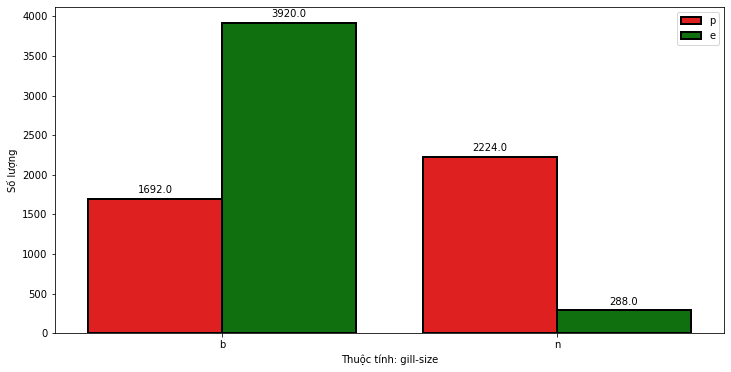

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh gill-color


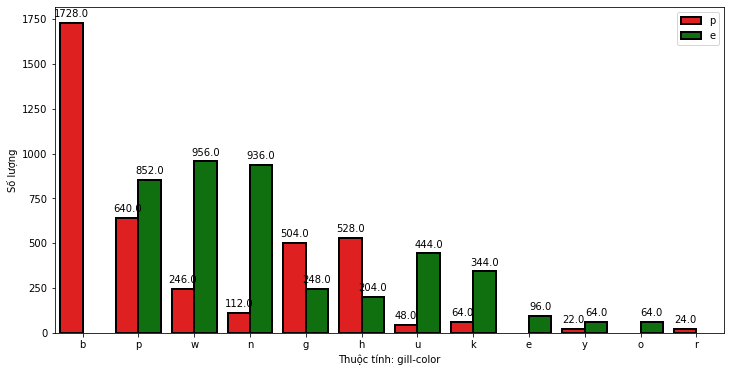

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh stalk-shape


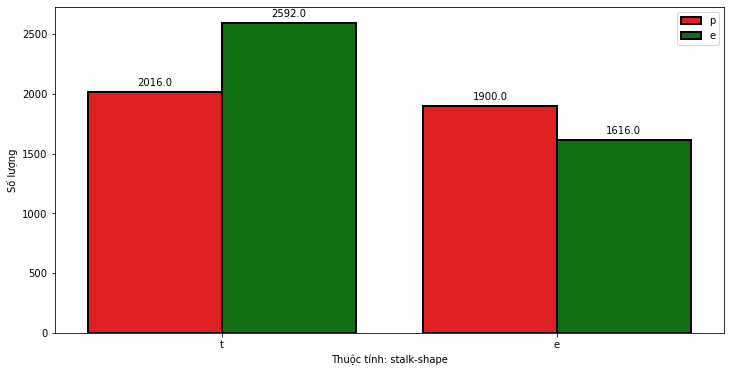

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh stalk-root


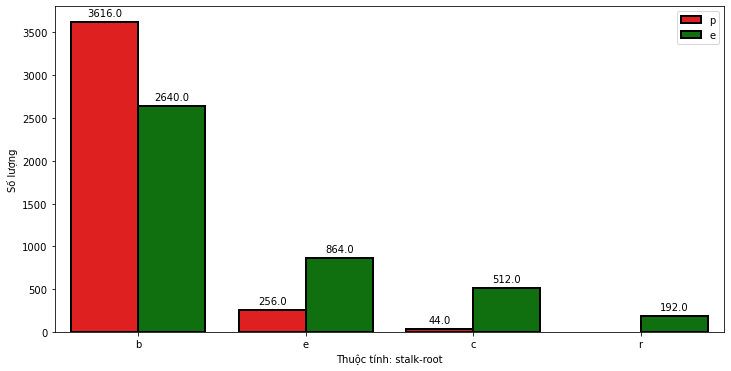

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh stalk-surface-above-ring


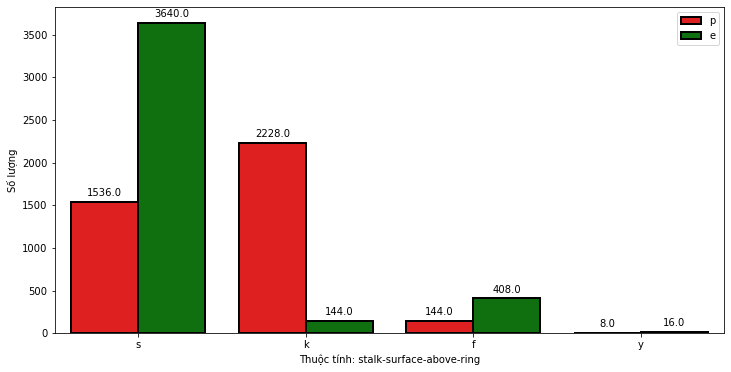

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh stalk-surface-below-ring


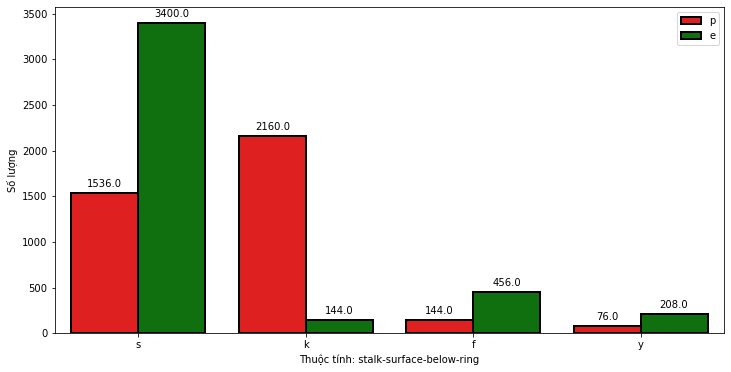

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh stalk-color-above-ring


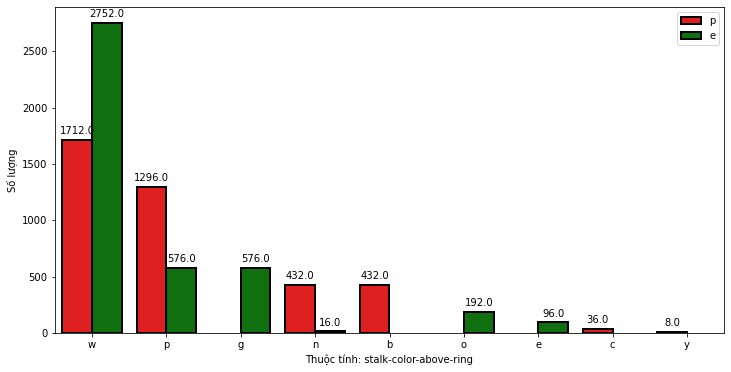

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh stalk-color-below-ring


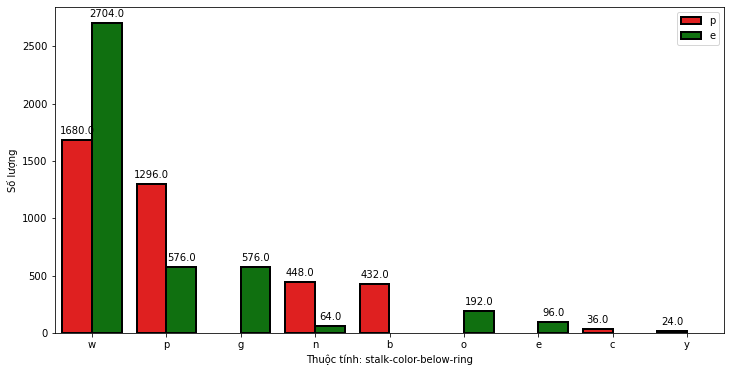

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh veil-color


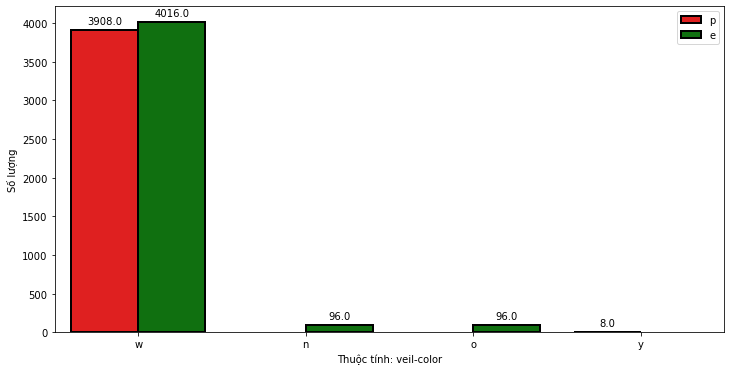

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh ring-number


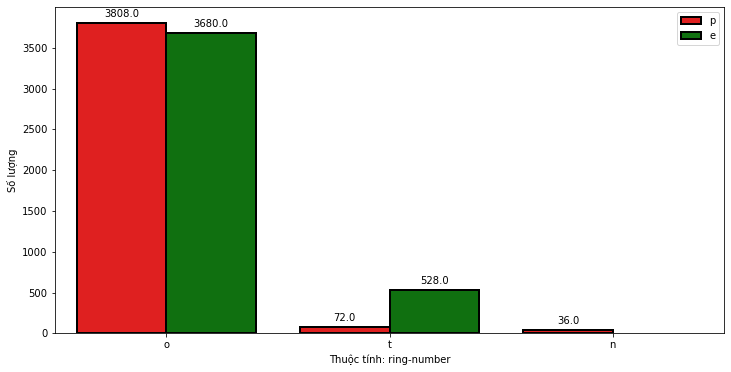

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh ring-type


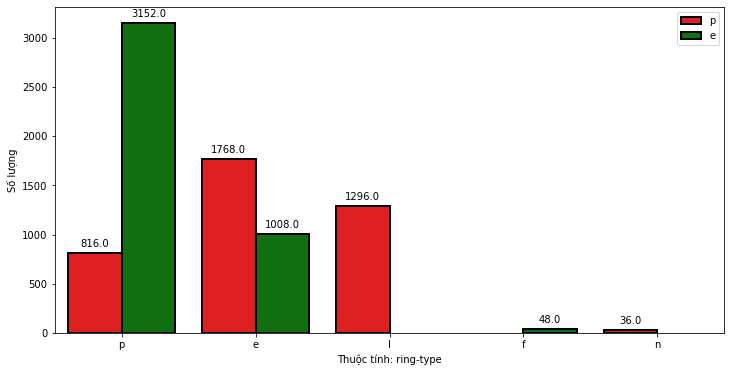

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh spore-print-color


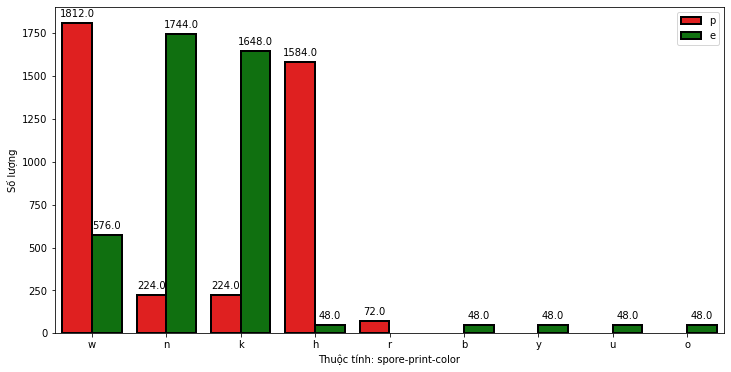

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh population


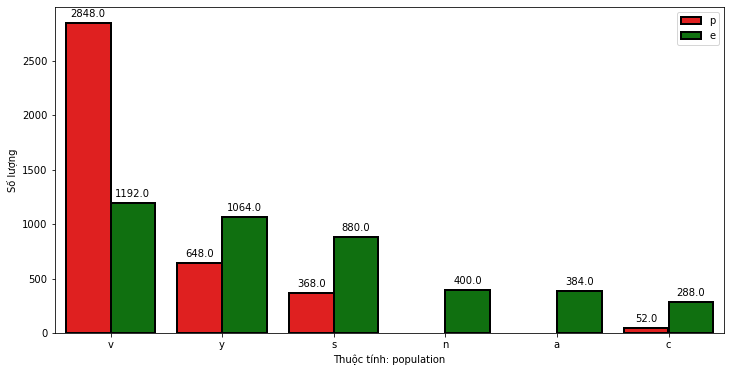

Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh habitat


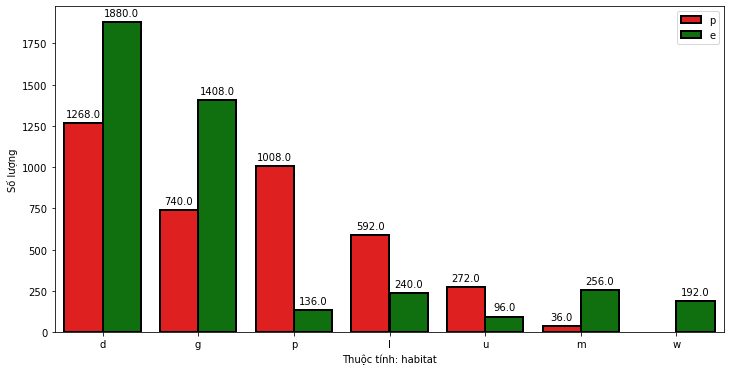

In [17]:
for c in df.columns[1:]:
    plt.figure(figsize = (12,6))
    print('Số lượng nấm ăn được và ko ăn được ở mỗi giá trị trong thuộc tinh',c)
    splot = sns.countplot(data = df, x = c,
                     hue = 'class', order = df[c].value_counts().index,
                     palette = ['red','green'], edgecolor = (0,0,0), linewidth  =2)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'),
                      (p.get_x()+p.get_width()/2.,p.get_height()),
                       ha = 'center', 
                       va = 'center', 
                       xytext = (0,9),
                       textcoords ='offset points')
    plt.legend(['p','e'], loc = 'upper right')
    plt.ylabel('Số lượng')
    plt.xlabel('Thuộc tính: {}'.format(c))
    plt.show()

### Xét mối tương quan giữa các biến

In [18]:
encoders = {}
for feature_name in list(df.columns):
    encoder = LabelEncoder()
    encoder.fit(df[feature_name])
    encoders[feature_name] = encoder
    df[feature_name] = encoder.transform(df[feature_name])

In [19]:
for col in df:
    print(f'{col}:{df[col].unique()}')

class:[1 0]
cap-shape:[5 0 4 2 3 1]
cap-surface:[2 3 0 1]
cap-color:[4 9 8 3 2 5 0 7 1 6]
bruises:[1 0]
odor:[6 0 3 5 2 1 8 7 4]
gill-attachment:[1 0]
gill-spacing:[0 1]
gill-size:[1 0]
gill-color:[ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape:[0 1]
stalk-root:[2 1 0 3]
stalk-surface-above-ring:[2 0 1 3]
stalk-surface-below-ring:[2 0 3 1]
stalk-color-above-ring:[7 3 6 4 0 2 5 1 8]
stalk-color-below-ring:[7 6 3 0 4 2 8 5 1]
veil-color:[2 0 1 3]
ring-number:[1 2 0]
ring-type:[4 0 2 1 3]
spore-print-color:[2 3 6 1 7 5 4 8 0]
population:[3 2 0 4 5 1]
habitat:[5 1 3 0 4 6 2]


In [20]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [21]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,3,3


In [22]:
#df_demo.to_csv('Data\Data_Mushrooms_Demo_ok.csv',index = None)

### Xem xét mối tương quan giữa các biến

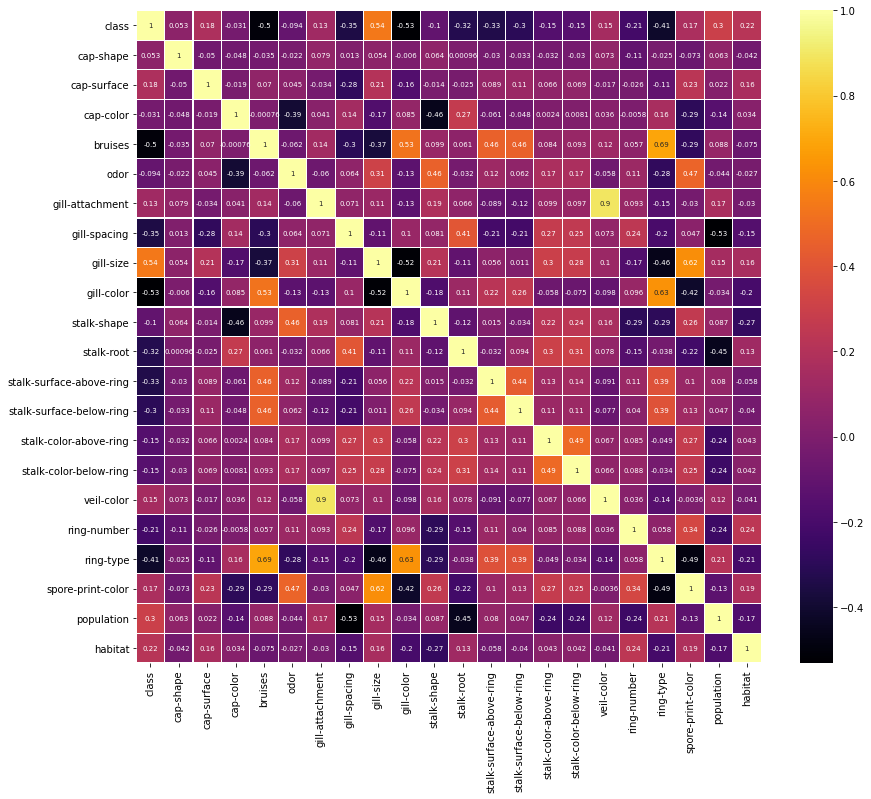

In [23]:
corr = df.corr()
plt.figure(figsize = (14,12))
sns.heatmap(df.corr(),linewidths = .1,cmap = 'inferno', annot = True, annot_kws = {'size':7})
plt.yticks(rotation = 0)
#plt.savefig('heatmap.png', format='png', dpi=500, bbox_inches='tight')
plt.show()


### Tương quan thuận cao nhất : gill-size (0.54)
### Tương quan nghịch thấp nhất: gill-color (-0.53)

In [24]:
df[['class','gill-color']].groupby(['gill-color'],as_index = False).mean().sort_values(by='class',ascending = False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


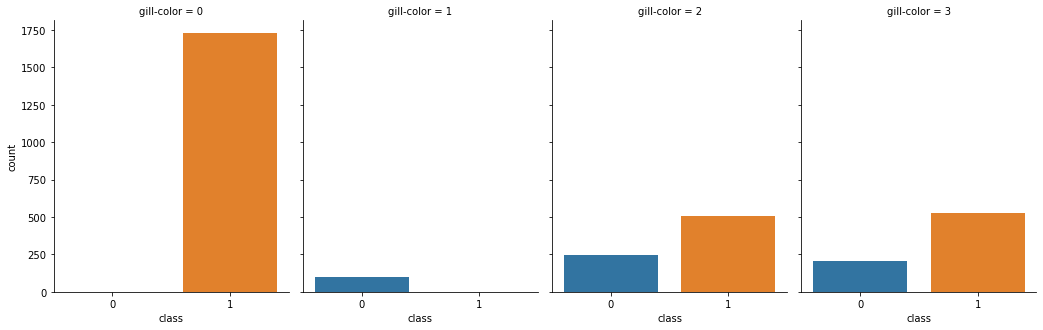

In [25]:
gc1_var = df[['class', 'gill-color']]
gc1_var = gc1_var[gc1_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=gc1_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

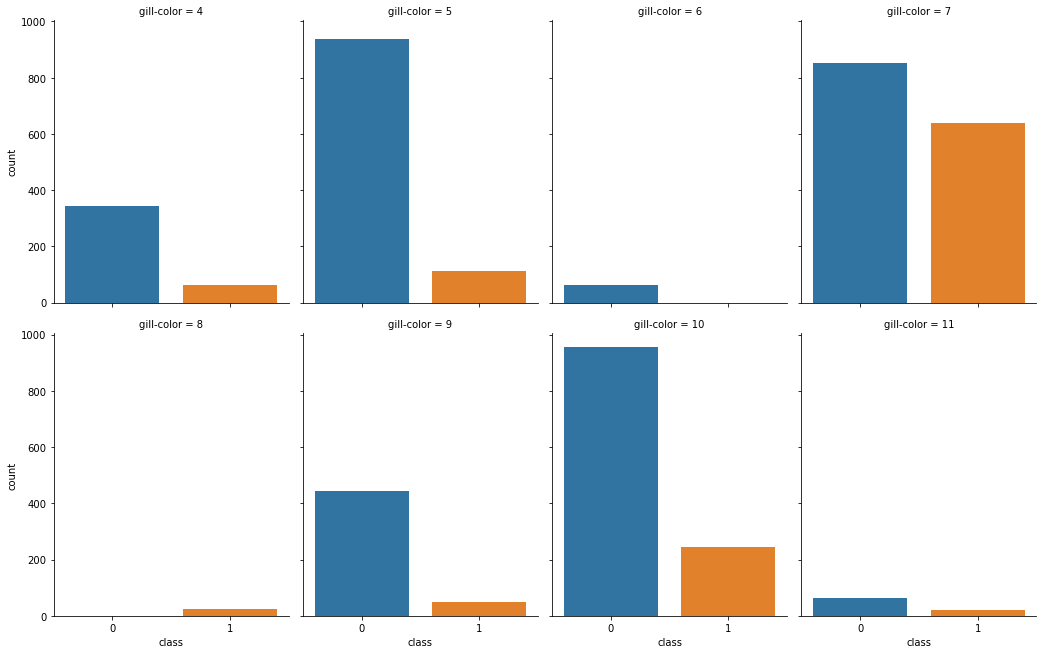

In [26]:
gc_var=df[['class', 'gill-color']]
gc_var=gc_var[gc_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=gc_var, kind='count', size=4.5, aspect=.8, col_wrap=4)
#plt.savefig('Pic\gillcolor2.png', format='png', dpi=400, bbox_inches='tight')

In [27]:
df[['class','gill-size']].groupby(['gill-size'],as_index = False).mean().sort_values(by='class',ascending = False)

,gill-size,class
1,1,0.885350
0,0,0.301497


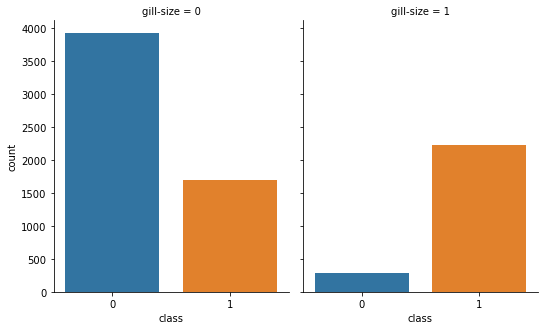

In [28]:
gs_var=df[['class', 'gill-size']]
gs_var=gs_var[gs_var['gill-size']>=0]
sns.factorplot('class', col='gill-size', data=gs_var, kind='count', size=4.5, aspect=.8, col_wrap=4)

### 3. Tách train - test
X: biến độc lập, y; Biến phụ thuộc: 'class'

In [29]:
X = df.drop(['class'],axis = 1)
y = df['class']

In [30]:
print(X.shape)
print(y.shape)

(8124, 21)
(8124,)


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [32]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (6499, 21)
X_test (1625, 21)
y_train (6499,)
y_test (1625,)


In [33]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7434,3,2,3,0,5,1,1,0,7,0,...,2,2,7,7,2,2,4,7,3,1
7725,5,0,8,0,5,1,1,0,2,0,...,2,2,7,7,2,2,4,7,2,1
783,5,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,2,3,3
1928,2,2,8,0,5,1,1,0,3,1,...,2,0,7,7,2,1,0,2,3,1
7466,3,3,2,0,8,1,0,1,0,1,...,2,1,7,6,2,1,0,7,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,5,3,2,1,5,1,0,0,1,0,...,2,2,2,2,2,2,0,7,1,6
3264,5,0,3,0,2,1,0,0,3,0,...,1,1,6,4,2,1,2,1,5,4
1653,5,2,3,0,5,1,1,0,3,1,...,0,2,7,7,2,1,0,3,3,1
2607,2,0,4,1,5,1,0,0,5,1,...,2,2,3,3,2,1,4,3,4,0


In [34]:
df.to_csv('Data\Data_Mushrooms_ok')

In [35]:
count = 0
for i in y_test:
    if i == 1:
        count = count +1
print('1:', count)
print('0:',len(y_test)-count)

1: 773
0: 852


### 4.Xây dựng mô hình

### Mô hình Phân loại KNN

In [36]:
best_Kvalue = 0
best_score = 0
for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = i,weights = 'distance',algorithm = 'ball_tree', p = 1)
    knn.fit(X_train,y_train)
    if knn.score(X_train,y_train) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
knn = KNeighborsClassifier(n_neighbors = best_Kvalue,weights = 'distance',algorithm = 'ball_tree', p = 1)
knn.fit(X_train,y_train)
#print(knn.get_params())
print('Best KKN score: ', format(best_Kvalue))


Best KKN score:  1


In [37]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))
print('Độ chính xác mô hình huấn luyện: {}%'. format(round(best_score*100,2)))
print('Độ chính xác trên tập Test: {}%'. format(round(accuracy_score(y_test, y_pred_knn)*100,2)))
print(y_pred_knn[:36])
print(y_test[:36].values)
print('Tổng số mẫu dự đoán đúng:', accuracy_score(y_test, y_pred_knn,normalize = False), ' /', len(y_test))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Độ chính xác mô hình huấn luyện: 100.0%
Độ chính xác trên tập Test: 100.0%
[1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0]
[1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0]
Tổng số mẫu dự đoán đúng: 1625  / 1625


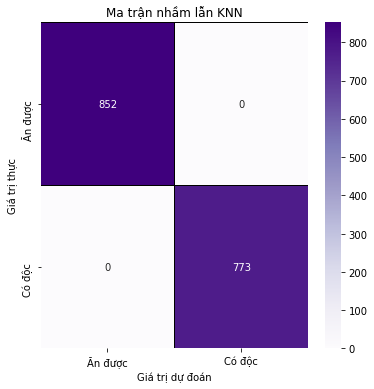

In [38]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
x_axis_label = ['Ăn được', 'Có độc']
y_axis_label = ['Ăn được', 'Có độc']
f, ax = plt.subplots(figsize = (6,6))
sns.heatmap(cm_knn, annot = True, linewidth = 0.2, linecolor = 'black', fmt = '.0f', ax = ax, cmap = 'Purples',
           xticklabels = x_axis_label, yticklabels = y_axis_label)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực')
plt.title('Ma trận nhầm lẫn KNN')
plt.show()

In [39]:
from sklearn import metrics
print('Confusion matrix Accuracy is: {}%'.format(round(metrics.accuracy_score(y_test, y_pred_knn)*100,2)))

Confusion matrix Accuracy is: 100.0%


### phân loại DecisionTree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


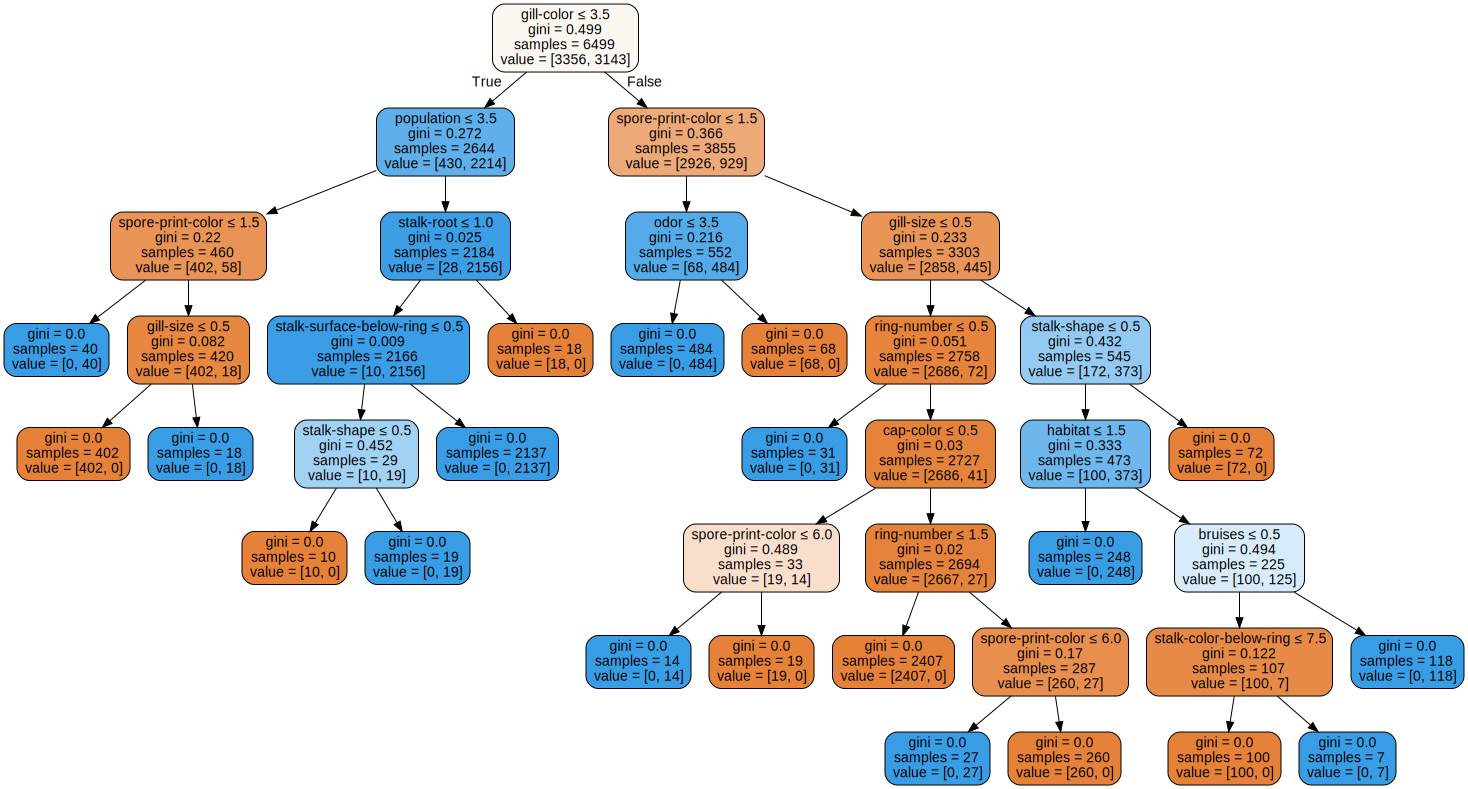

In [42]:
from sklearn import tree
import graphviz
os.environ['PATH'] += os.pathsep + r'C:\Users\Admin\anaconda3\Library\bin\graphviz'
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns, filled=True, rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph
#graph.view()


### Tầm quan trọng của tính năng trong DT

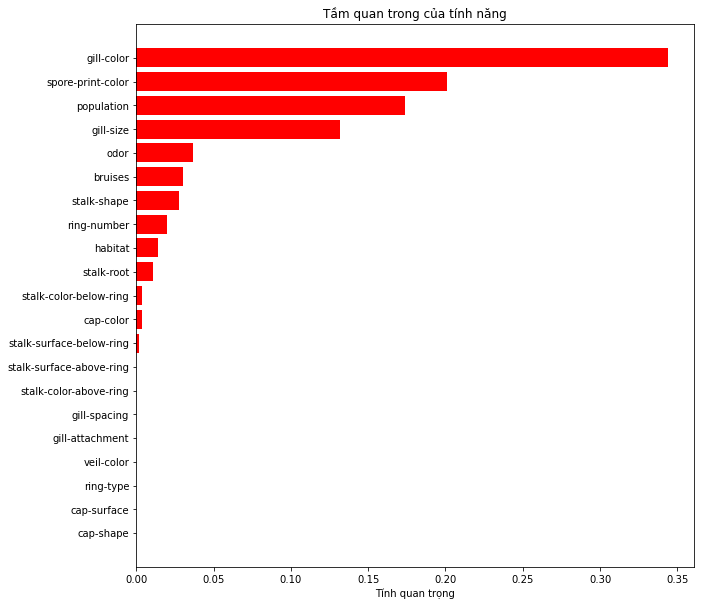

In [43]:
f_list = X.columns.values
f_qt = dt.feature_importances_
sort = np.argsort(f_qt)
plt.figure(figsize = (10,10))
plt.barh(range(len(sort)), f_qt[sort], align = 'center', color = 'red')
plt.yticks(range(len(sort)), f_list[sort])
plt.xlabel('Tính quan trọng')
plt.title('Tầm quan trong của tính năng')
plt.draw()
plt.show()


In [44]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Độ chính xác mô hình: {}%".format(round(dt.score(X_train,y_train)*100, 2)))
print('Đọ chính xác trên test: {}%'.format(round(accuracy_score(y_test,y_pred_dt)*100,2)))
print('Tổng số mẫu dự đoán đúng:', accuracy_score(y_test, y_pred_dt,normalize = False), ' /', len(y_test))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Độ chính xác mô hình: 100.0%
Đọ chính xác trên test: 100.0%
Tổng số mẫu dự đoán đúng: 1625  / 1625


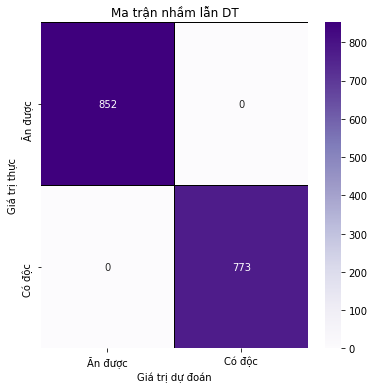

In [45]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Ăn được", "Có độc"]
y_axis_labels = ["Ăn được", "Có độc"]
f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cm_dt, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực")
plt.title('Ma trận nhầm lẫn DT')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [46]:
print('Confusion matrix Accuracy is: {}%'.format(round(metrics.accuracy_score(y_test, y_pred_dt)*100,2)))

Confusion matrix Accuracy is: 100.0%


### phân loại hồi quy logistic

In [47]:
from sklearn.linear_model import LogisticRegression
#print(LogisticRegression().get_params())
lr = LogisticRegression(penalty = 'none',solver='sag', max_iter=500,l1_ratio = 1,random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(l1_ratio=1, max_iter=500, penalty='none', random_state=42,
                   solver='sag')

In [48]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))
print("Độ chính xác trên mô hình: {}%".format(round(lr.score(X_train, y_train)*100,2)))
print('Đọ chính xác trên test: {}%'.format(round(accuracy_score(y_test,y_pred_lr)*100,2)))
print('Tổng số mẫu dự đoán đúng:', accuracy_score(y_test, y_pred_lr,normalize = False), ' /', len(y_test))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.98      0.97       852
           1       0.97      0.95      0.96       773

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

Độ chính xác trên mô hình: 96.68%
Đọ chính xác trên test: 96.55%
Tổng số mẫu dự đoán đúng: 1569  / 1625


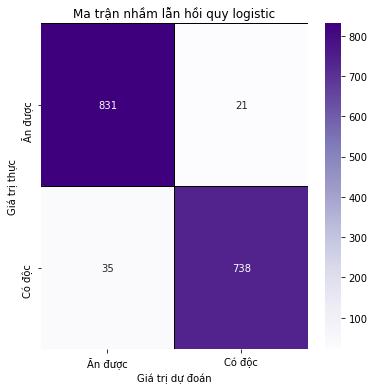

In [49]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
x_axis_label = ['Ăn được', 'Có độc']
y_axis_label = ['Ăn được', 'Có độc']
f, ax = plt.subplots(figsize = (6,6))
sns.heatmap(cm_lr, annot = True, linewidth = 0.2, linecolor = 'black', fmt = '.0f', ax = ax, cmap = 'Purples',
           xticklabels = x_axis_label, yticklabels = y_axis_label)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực')
plt.title('Ma trận nhầm lẫn hồi quy logistic')
plt.show()

In [50]:
print('Confusion matrix Accuracy is: {}%'.format(round(metrics.accuracy_score(y_test, y_pred_lr)*100,2)))

Confusion matrix Accuracy is: 96.55%


### phân loại naive bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
#print(GaussianNB().get_params())
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [52]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))
print("Độ chính xác trên mô hình: {}%".format(round(nb.score(X_train,y_train)*100,2)))
print('Đọ chính xác trên test: {}%'.format(round(accuracy_score(y_test,y_pred_nb)*100,2)))
print('Tổng số mẫu dự đoán đúng:', accuracy_score(y_test, y_pred_nb,normalize = False), ' /', len(y_test))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.92      0.90      0.91       852
           1       0.89      0.92      0.90       773

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

Độ chính xác trên mô hình: 90.72%
Đọ chính xác trên test: 90.58%
Tổng số mẫu dự đoán đúng: 1472  / 1625


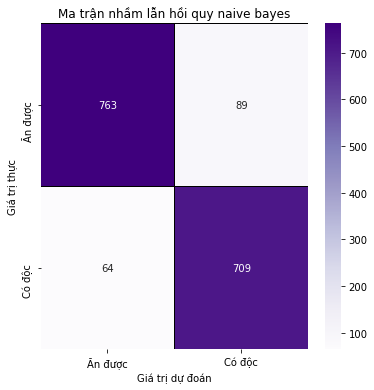

In [53]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
x_axis_label = ['Ăn được', 'Có độc']
y_axis_label = ['Ăn được', 'Có độc']
f, ax = plt.subplots(figsize = (6,6))
sns.heatmap(cm_nb, annot = True, linewidth = 0.2, linecolor = 'black', fmt = '.0f', ax = ax, cmap = 'Purples',
           xticklabels = x_axis_label, yticklabels = y_axis_label)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực')
plt.title('Ma trận nhầm lẫn hồi quy naive bayes')
plt.show()

In [54]:
print('Confusion matrix Accuracy is: {}%'.format(round(metrics.accuracy_score(y_test, y_pred_nb)*100,2)))

Confusion matrix Accuracy is: 90.58%


### Phân loại Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))
print("Độ chính xác trên mô hình: {}%".format(round(rf.score(X_train,y_train)*100, 2)))
print('Đọ chính xác trên test: {}%'.format(round(accuracy_score(y_test,y_pred_rf)*100,2)))
print('Tổng số mẫu dự đoán đúng:', accuracy_score(y_test, y_pred_rf,normalize = False), ' /', len(y_test))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Độ chính xác trên mô hình: 100.0%
Đọ chính xác trên test: 100.0%
Tổng số mẫu dự đoán đúng: 1625  / 1625


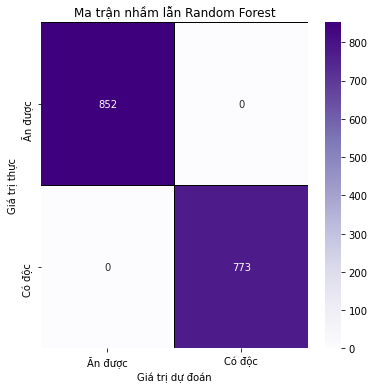

In [57]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
x_axis_label = ['Ăn được', 'Có độc']
y_axis_label = ['Ăn được', 'Có độc']
f, ax = plt.subplots(figsize = (6,6))
sns.heatmap(cm_rf, annot = True, linewidth = 0.2, linecolor = 'black', fmt = '.0f', ax = ax, cmap = 'Purples',
           xticklabels = x_axis_label, yticklabels = y_axis_label)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực')
plt.title('Ma trận nhầm lẫn Random Forest')
plt.show()

In [58]:
print('Confusion matrix Accuracy is: {}%'.format(round(metrics.accuracy_score(y_test, y_pred_rf)*100,2)))

Confusion matrix Accuracy is: 100.0%


### 5.So sánh giữa các mô hình

In [59]:
from sklearn.model_selection import ShuffleSplit
models = [lr, knn, dt, nb, rf]
cv_split = ShuffleSplit(n_splits = 10,
                       test_size = 0.2,
                       train_size = 0.8,
                       random_state = 0)
column = ['Name', 'Parameters', 'TrainAccuracyMean',
           'TestAccuracyMean', 'F1-ScoreMean','AvgTrainingTime']
score = ['accuracy','precision_macro', 'recall_macro']
compare = pd.DataFrame(columns = column)
for row_index, model in enumerate(models):
    model_name = model.__class__.__name__
    print(f'training start for {model_name}')
    cv_results = cross_validate(model,
                                X_train,
                                y_train,
                                cv=cv_split,
                                scoring=score,
                                return_train_score=True,
                                n_jobs=-1)
    compare.loc[row_index, 'Name'] = model_name
    compare.loc[row_index,'Parameters'] = str(model.get_params())
    compare.loc[row_index, 'TrainAccuracyMean'] = cv_results['train_accuracy'].mean()
    compare.loc[row_index, 'TestAccuracyMean'] = cv_results['test_accuracy'].mean()
    compare.loc[row_index, 'AvgTrainingTime'] = cv_results['fit_time'].mean()
    compare.loc[row_index, 'F1-ScoreMean'] = 2*(cv_results['test_precision_macro'].mean()*cv_results['test_recall_macro'].mean())/(cv_results['test_precision_macro'].mean()+cv_results['test_recall_macro'].mean())
    print(f'Training complete! ')
    compare.sort_values(by=['TestAccuracyMean'],
                       ascending = False,
                       inplace = True)
    print(model.get_params(), '\n')


training start for LogisticRegression
Training complete! 
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 1, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': 42, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

training start for KNeighborsClassifier
Training complete! 
{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'distance'} 

training start for DecisionTreeClassifier
Training complete! 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'} 

training start for GaussianNB
Training complete! 
{'priors': None, 'var_smoothing': 1e-09} 

training start 

In [60]:
compare

,Name,Parameters,TrainAccuracyMean,TestAccuracyMean,F1-ScoreMean,AvgTrainingTime
1,KNeighborsClassifier,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'm...",1.0,1.0,1.0,0.046377
2,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,1.0,1.0,0.025331
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1.0,1.0,1.0,0.520126
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.966994,0.963846,0.963847,1.455543
3,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.906924,0.905769,0.905794,0.015077


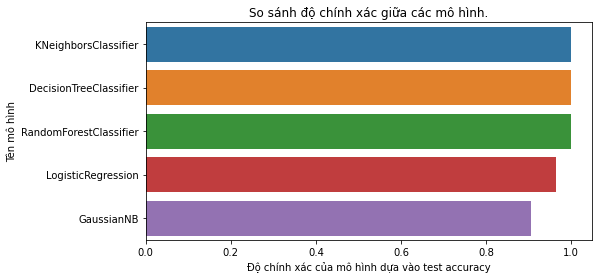

In [61]:
plt.figure(figsize = (8,4))
cp = sns.barplot(x = 'TestAccuracyMean',y = 'Name', data = compare)
plt.title('So sánh độ chính xác giữa các mô hình.')
plt.xlabel('Độ chính xác của mô hình dựa vào test accuracy')
plt.ylabel('Tên mô hình')
plt.show()

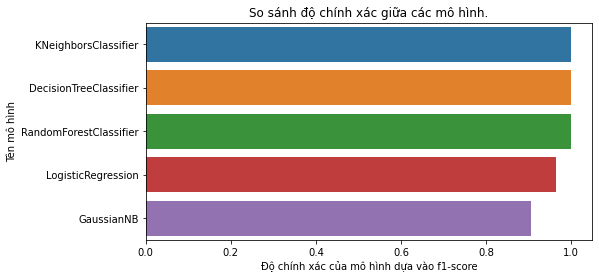

In [62]:
plt.figure(figsize = (8,4))
cp = sns.barplot(x = 'F1-ScoreMean',y = 'Name', data = compare)
plt.title('So sánh độ chính xác giữa các mô hình.')
plt.xlabel('Độ chính xác của mô hình dựa vào f1-score')
plt.ylabel('Tên mô hình')
plt.show()

### 6.Dự đoán cho dữ liệu mới

In [63]:
df_demo = pd.read_csv('Data\Data_Mushrooms_Demo_ok.csv')
df_demo

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,0,10,0,...,2,2,7,7,2,1,4,2,3,5
1,0,3,8,1,3,1,0,0,4,0,...,2,2,7,3,2,1,4,3,1,3


In [64]:
# Sử dụng mô hình có độ chính xác cao nhất để dữ đoán: Decision Tree
y_demo = dt.predict(df_demo)
for i in range(0,len(y_demo)):
    if y_demo[i] == 0:
        print('Nấm thứ', i+1, ': Đây là nấm ăn được')
    else:
        print('Nấm thứ', i+1, ': Đây là nấm có độc')

Nấm thứ 1 : Đây là nấm ăn được
Nấm thứ 2 : Đây là nấm ăn được


In [65]:
# Sử dụng mô hình có độ chính xác thấp nhất để dự đoán: Naive Bayes
y_demo2 = nb.predict(df_demo)
for i in range(0,len(y_demo2)):
    if y_demo2[i] == 0:
        print('Nấm thứ', i+1, ': Đây là nấm ăn được')
    else:
        print('Nấm thứ', i+1, ': Đây là nấm có độc')

Nấm thứ 1 : Đây là nấm ăn được
Nấm thứ 2 : Đây là nấm ăn được
